# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.105448e+01     6.731957e+00
 * time: 0.003171205520629883
     1     3.026456e+01     4.555019e+00
 * time: 0.014104127883911133
     2     2.334004e+01     6.601438e+00
 * time: 0.027514219284057617
     3     1.899632e+01     5.822791e+00
 * time: 0.0412750244140625
     4     1.639753e+01     4.304069e+00
 * time: 0.055425167083740234
     5     1.192821e+01     2.445420e+00
 * time: 0.06905722618103027
     6     1.106291e+01     2.699657e+00
 * time: 0.08046221733093262
     7     1.000063e+01     1.882731e+00
 * time: 0.09180617332458496
     8     9.346648e+00     1.324902e+00
 * time: 0.1031191349029541
     9     8.860327e+00     1.137443e+00
 * time: 0.11445403099060059
    10     8.522706e+00     1.185379e+00
 * time: 0.1259441375732422
    11     8.288611e+00     8.211652e-01
 * time: 0.1375570297241211
    12     8.148606e+00     7.808546e-01
 * time: 0.14875316619873047
    13     8.090766e+00     5.059652e-01
 * time:

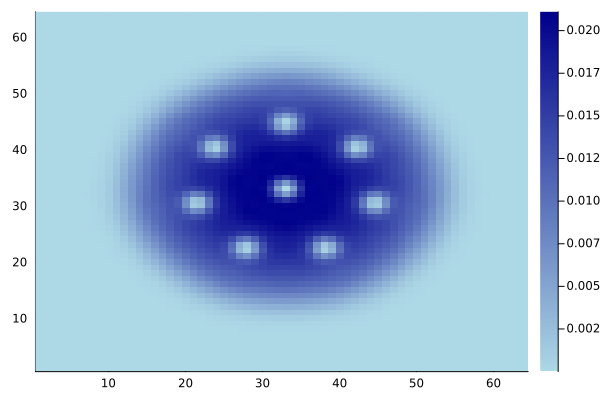

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)